In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import random

In [2]:
xmin = -5
xmax = 25

J=500 #ilość kroków na x
delta_x = (xmax-xmin)/J

delta_t = 0.002 #krok czasowy

k0 = 10
delta_k = 1

t0 = 0
t = 1

Nt = int((t-t0)/delta_t) #ilość kroków czasowych

V0 = 105
sigma = 0.5

In [3]:
x = np.linspace(xmin,xmax,J)   # położenia x

V = np.zeros(J)  #potencjały
for i in range (J):
    V[i] = V0*np.exp(-pow(x[i]-10,2)/pow(sigma,2))   

# macierz po prawej stronie równania
M = np.diag([-1j*delta_t/2/pow(delta_x,2) for i in range(J-1)], -1) +\
      np.diag([(1 + (2/pow(delta_x,2)+V[i])*delta_t/2 * 1j) for i in range(J)]) +\
      np.diag([-delta_t/2/pow(delta_x,2) * 1j for i in range(J-1)], 1)

# macierz po lewej stronie równania
R = np.diag([delta_t/2/pow(delta_x,2) * 1j for i in range(J-1)], -1) +\
      np.diag([(1 - (2/pow(delta_x,2)+V[i])*delta_t/2 * 1j) for i in range(J)]) +\
      np.diag([delta_t/2/pow(delta_x,2) * 1j for i in range(J-1)], 1)

In [4]:
psi0 = np.zeros(J, dtype='complex_')   # tablica wartości początkowych psi 

for i in range(1, J-1):
        psi0[i] = np.sqrt(delta_k)*np.exp(-pow(x[i],2)*pow(delta_k,2)/2)*np.exp(-1j*k0*x[i])/pow(np.pi,1/4)        

In [5]:
psi = np.linalg.solve(R,M.dot(psi0))   # nowe psi, zależne od poprzedniego kroku

Psi = []
Psi.append(np.abs(psi))  # moduł psi

0.9979999999989739
0.9979999999989708
0.9979999999989672
0.9979999999989639
0.9979999999989602
0.9979999999989572
0.9979999999989537
0.9979999999989518
0.9979999999989514
0.9979999999989518
0.9979999999989528
0.9979999999989535
0.9979999999989526
0.9979999999989505
0.9979999999989475
0.9979999999989446
0.9979999999989418


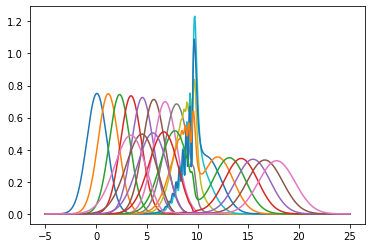

In [6]:
for i in range(Nt-1): #pętla kroków
    r = psi
    psi = np.linalg.solve(R,M.dot(psi))  # nowe psi, zależne od poprzedniego
    Psi.append(np.abs(psi))
    if i%30==0: #wyjędzie do wykresu tylko co 10 -> do sprawdzenia czy funkcje wyglądają poprawnie
        print(np.sum(np.abs(psi)**2)*delta_x) #sprawdzenie stabliności normalizacji
        plt.plot(x, np.abs(psi))

plt.show()

<IPython.core.display.Javascript object>


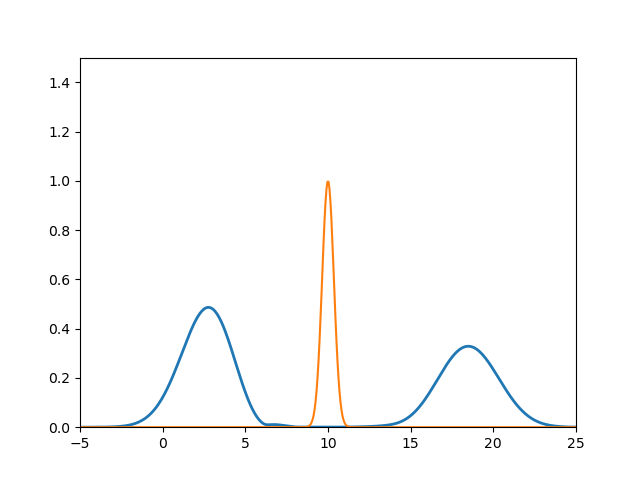

MovieWriter imagemagick unavailable; using Pillow instead.


In [7]:
# animacja
%matplotlib notebook
fig, ax = plt.subplots()

xdata = x
ydata = []
ln, = plt.plot([], [], lw=2)
ax.plot(x, V/V0)

def init():
    ax.set_xlim(-5,25)
    ax.set_ylim(0, 1.5)
    ln.set_data(xdata, [])
    return ln,

def update(frame):
    ln.set_ydata(Psi[frame])
    return ln,

ani = FuncAnimation(fig, update, init_func = init,
                      interval = 10, blit = True)
ani.save('schrodinger.gif', writer='imagemagick')
plt.draw()

plt.show()